# Luokittelu - K-Means Cluster

Klassinen esimerkki luokittelusta on kurjenmiekkojen (iris) luokittelu kolmeen lajiin (setosa, versicolor, virginica) 
terä- (petal) ja verholehtien (sepal) koon mukaan. Seuraavassa kokeilen lajien tunnistamista ilman opetusdataa.

<h3>K-Means Cluster -menetelmän idea</h3>

Menetelmän tarkoituksena on löytää datasta K-kappaletta ryhmiä (klustereita, segmenttejä). Ryhmät muodostetaan ryhmäkeskusten ympärille.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Esimerkkidata löytyy seaborn-kirjastosta:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Feature-matriisi on iris-data ilman species-muuttujaa:
X = iris.drop('species', axis=1)

In [4]:
# Gaussian naive bayes -mallin tuonti:
from sklearn.cluster import KMeans

# Mallin sovitus:
malli = KMeans(n_clusters=3)
malli.fit(X)

# Ryhmien keskukset (sepal_length, sepal_width, petal_length, petal_width):
malli.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [5]:
# Ryhmiin kuulumiset:
X['K'] = malli.predict(X)
pd.crosstab(X['K'], 'lkm')

col_0,lkm
K,
0,62
1,50
2,38


In [6]:
# Tunnuslukuja ryhmittäin:
X.groupby('K').describe().T

K                           0          1          2
sepal_length count  62.000000  50.000000  38.000000
             mean    5.901613   5.006000   6.850000
             std     0.466410   0.352490   0.494155
             min     4.900000   4.300000   6.100000
             25%     5.600000   4.800000   6.425000
             50%     5.900000   5.000000   6.700000
             75%     6.200000   5.200000   7.200000
             max     7.000000   5.800000   7.900000
sepal_width  count  62.000000  50.000000  38.000000
             mean    2.748387   3.428000   3.073684
             std     0.296284   0.379064   0.290092
             min     2.000000   2.300000   2.500000
             25%     2.500000   3.200000   2.925000
             50%     2.800000   3.400000   3.000000
             75%     3.000000   3.675000   3.200000
             max     3.400000   4.400000   3.800000
petal_length count  62.000000  50.000000  38.000000
             mean    4.393548   1.462000   5.742105
             std     0.508895   0.173664   0.488590
             min     3.000000   1.000000   4.900000
             25%     4.025000   1.400000   5.425000
             50%     4.500000   1.500000   5.650000
             75%     4.800000   1.575000   6.000000
             max     5.100000   1.900000   6.900000
petal_width  count  62.000000  50.000000  38.000000
             mean    1.433871   0.246000   2.071053
             std     0.297500   0.105386   0.279872
             min     1.000000   0.100000   1.400000
             25%     1.300000   0.200000   1.825000
             50%     1.400000   0.200000   2.100000
             75%     1.575000   0.300000   2.300000
             max     2.400000   0.600000   2.500000

In [7]:
# Katsotaan miten muodostetut ryhmät suhteutuvat lajikkeisiin:
pd.crosstab(X['K'], iris['species'])

species,setosa,versicolor,virginica
K,,,
0,0,48,14
1,50,0,0
2,0,2,36


Muodostetut ryhmät (0, 1 ja 2) osuvat selkeästä eri lajikkeiden (setosa, versicolor ja virginica) kohdalle, mutta aivan kaikki eivät osu oikean lajikkeen kohdalle.

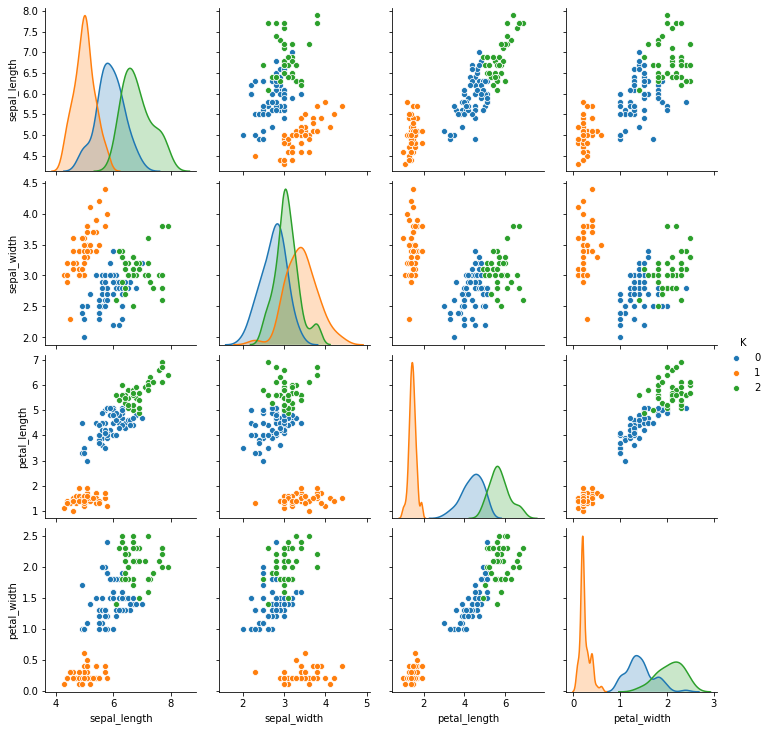

In [8]:
sns.pairplot(X, hue='K')